In [57]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from pydantic import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate


load_dotenv()

True

In [5]:
from langchain.embeddings import OpenAIEmbeddings
import os

# OpenAI APIキーを環境変数から取得
openai_api_key = os.getenv("OPENAI_API_KEY")

# OpenAIのEmbeddingモデルを初期化
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

# テキストのリストを埋め込みに変換
texts = ["Hello, world!", "Langchain is great for embeddings."]
embedding_vectors = embeddings.embed_documents(texts)

print(embedding_vectors)

/var/folders/m3/0k1v07955_76mn3c3nxl9n680000gn/T/ipykernel_83607/3966972337.py:8: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)


[[0.0014598659807259792, 0.0034020946675499455, -0.01302059955946407, -0.033401221802738114, -0.009493920238436815, 0.004874738510707943, -0.015461163018491566, 0.0018767423892424358, -0.00298202393894464, -0.024993416494978462, 0.02992565625974542, 0.0071747462978905075, -0.016917834446298047, -0.018016726191669306, 0.010420312412582705, -0.0030027877762217677, 0.025031749733028543, -0.015205606235512493, 0.011423371994151358, 0.011014481327649362, -0.008311972212634446, -0.001907089768862733, 0.017096724753176955, 0.005753213671629934, -0.014323937103747627, -0.0075644698797061646, 0.003545845241560349, -0.015818942700926784, 0.03743901562104611, -0.02605397686494483, 0.010056144788461735, -0.006593355594501844, -0.004823627060979869, -0.013838379961145465, 0.011819483983314064, -0.01917950852976923, 0.005018489084718347, -0.011506427343259868, 0.019498954042831772, -0.011787539618272329, 0.0048076548784590015, 0.005670157856860126, 0.0031305659348806547, -0.006126965070924724, -0.02

In [6]:
from langchain_groq import ChatGroq

In [7]:
llm = ChatGroq(model_name="Gemma2-9b-It")

In [8]:
llm.invoke("hi hello how are you?")

AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 15, 'total_tokens': 48, 'completion_time': 0.06, 'prompt_time': 9.0029e-05, 'queue_time': 0.021622091000000003, 'total_time': 0.060090029}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-0e2c44c4-1df6-4854-9b4d-4d1b291402ad-0', usage_metadata={'input_tokens': 15, 'output_tokens': 33, 'total_tokens': 48})

In [9]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [10]:
docs = [WebBaseLoader(url).load() for url in urls]

In [13]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [16]:
docs[0][0].metadata


{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [14]:
docs_list = [item for sublist in docs for item in sublist]


In [15]:
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [17]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=5)
doc_splits=text_splitter.split_documents(docs_list)
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [20]:
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=embeddings
)

In [52]:
retriever = vectorstore.as_retriever()

In [22]:
retriever_tool = create_retriever_tool(
    retriever = retriever,
    name = "retriever_blog_posts",
    description = "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs."
)

In [24]:
tools = [retriever_tool]

In [53]:
retrieve = ToolNode([retriever_tool])

In [78]:
def AI_Assistant(state:AgentState):
    print("---CALL AGENT---")
    messages = state['messages']
    llm_with_tool = llm.bind_tools(tools)
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [83]:
def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n
    Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is the initial question:
    \n ------- \n
    {question}
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    response = llm.invoke(msg)
    return {"messages": [response]}

In [76]:
class grade(BaseModel):
    binary_score:str=Field(description="Relevance score 'yes' or 'no'")

In [77]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [80]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")

    rag_chain = prompt | llm | StrOutputParser()

    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [79]:
def grade_documents(state:AgentState):
    llm_with_structure_op=llm.with_structured_output(grade)

    prompt=PromptTemplate(
         template="""You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"]
    )
    chain = prompt | llm_with_structure_op

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generator"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter"

In [82]:
prompt = hub.pull("rlm/rag-prompt")
prompt.pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [84]:
workflow=StateGraph(AgentState)
workflow.add_node("ai_assistant",AI_Assistant)
workflow.add_node("retriever", retrieve)
workflow.add_node("rewriter", rewrite)
workflow.add_node("generator", generate)

In [85]:
workflow.add_edge(START,"ai_assistant")
workflow.add_conditional_edges("ai_assistant",tools_condition,
                               {"tools": "retriever",
                                END: END,})


In [86]:
workflow.add_conditional_edges("retriever",
                               grade_documents,
                               {"rewriter": "rewriter","generator": "generator"})


In [87]:
workflow.add_edge("generator", END)
workflow.add_edge("rewriter", "ai_assistant")

In [88]:
app = workflow.compile()

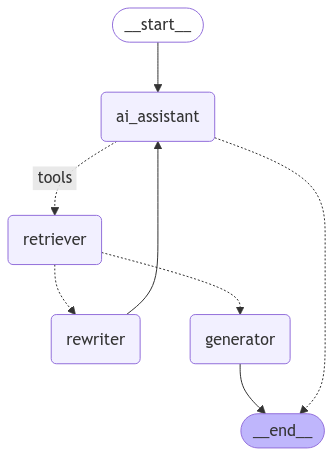

In [90]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [91]:
app.invoke({"messages":["What is a Autonomous Agent?"]})

---CALL AGENT---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='0e5ea3f6-740a-48f6-915e-e7a5638fa271'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gayp', 'function': {'arguments': '{"query":"Autonomous Agent"}', 'name': 'retriever_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 979, 'total_tokens': 1064, 'completion_time': 0.154545455, 'prompt_time': 0.030952483, 'queue_time': 0.021005793999999998, 'total_time': 0.185497938}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2b2a6a86-9018-4139-bdbe-ceaa2d14e9c0-0', tool_calls=[{'name': 'retriever_blog_posts', 'args': {'query': 'Autonomous Agent'}, 'id': 'call_gayp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 979, 'output_tokens': 85, 'total_tokens': 1064}),
  ToolMessage(content='Boiko et al. (2023) also lo